In [80]:
#load csv
import csv
import os
import sys
import re
import json
import pandas as pd
import numpy as np

#read csv file with path:
csv_filepath = "../data/skylab_instagram_datathon_dataset.csv"
df_real = pd.read_csv(csv_filepath, sep=';')
#make the period_end_date column a datetime object
df_real['period_end_date'] = pd.to_datetime(df_real['period_end_date'])
#drop calculation_type column
df_real.drop(columns=['calculation_type'], inplace=True)
#drop period column
df_real.drop(columns=['period'], inplace=True)
#drop all values named All Brand from business entity doing_business as name
df_real = df_real[df_real['business_entity_doing_business_as_name'] != 'All Brands']


 
grouping_columns = [col for col in df_real.columns if col != 'compset']

df_real.fillna('Group_Null', inplace=True)
df_real = df_real.groupby(grouping_columns).agg({'compset': lambda x: set(x)}).reset_index()
df_real.replace('Group_Null', pd.NA, inplace=True)

df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('china;hong kong', 'hong kong')

# remove the sign ";" in column domicile_country_name
df_real['domicile_country_name'] = df_real['domicile_country_name'].str.replace(';', '')

# if empty, fill with nan
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('', np.nan)

df = df_real




C:\Users\samut\AppData\Local\Temp\ipykernel_47788\974909861.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Group_Null' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_real.fillna('Group_Null', inplace=True)


In [81]:
df_real_wo_all = df_real[df_real['business_entity_doing_business_as_name'] != 'All Brands']


In [83]:
#get the compset column values
compset_values = df_real['compset_'].values

In [85]:
#get the Luxury & Premium & Mainstream compnays in a new data set
df_real_Luxury = df_real[df_real['compset_group'].str.contains('Luxury')]
df_real_Premium = df_real[df_real['compset_group'].str.contains('Premium')]



In [32]:
#do any compnays have multiple compeset croups they are apart of? we need too exclue the dates because they are not unique
multiple_compeset_croups =df_real_wo_all.groupby('business_entity_doing_business_as_name')['compset_group'].nunique().sort_values(ascending=False)
#is there any value in this list greater than one?
multiple_compeset_croups[multiple_compeset_croups > 1].count()


#for the same date does any compay have two diffrent follower counts
multiple_follower_counts = df_real_wo_all.groupby(['business_entity_doing_business_as_name', 'period_end_date'])['followers'].nunique().sort_values(ascending=False)
multiple_follower_counts[multiple_follower_counts > 1].count()


0

<Axes: title={'center': 'Follower count on companies min date'}, ylabel='Frequency'>

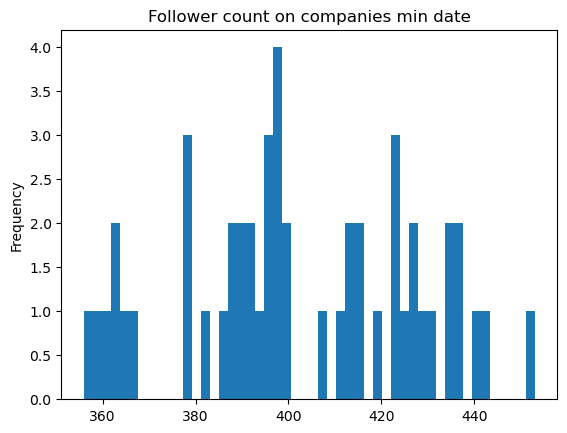

In [33]:


#find the min date for each company and have count of followers
min_date_followers = df_real_wo_all.groupby('business_entity_doing_business_as_name').agg({'period_end_date': 'min', 'followers': 'count'})
#min date in the dataset



#get rid of any company thats min_date_follwers date is larger than'2015-01-03'
min_date_followers_after = min_date_followers[min_date_followers['period_end_date'] > min_date_followers['period_end_date'].min()]
m=min_date_followers_after.nlargest(50, 'followers')
m['followers'].plot(kind='hist', bins=50, title='Follower count on companies min date')

#for each company in m find the companys followers count each week for the first 4 weeks




In [34]:
import pandas as pd

# Filter the DataFrame to include only the rows where the period is "Weekly"
#df_filtered = df_real_wo_all[df_real_wo_all['period'] == 'Weekly']

# Sort the DataFrame by the "period_end_date" column in ascending order
#df_sorted = df_filtered.sort_values('period_end_date')
#df_sorted

# Group the DataFrame by the "business_entity_doing_business_as_name" column
#grouped_df = df_sorted.groupby('business_entity_doing_business_as_name')

# Calculate the change in followers from the first week to the second week
#df_sorted['follower_change'] = grouped_df['followers'].diff()

# Calculate the average change in follower count for a while after the third week
#df_sorted['average_follower_change'] = grouped_df['follower_change'].rolling(window=3, min_periods=1).mean().shift(-2)

# Compare the change in followers from the first week to the second week with the average change in follower count for a while after the third week
#df_sorted['follower_spike'] = df_sorted['follower_change'] > df_sorted['average_follower_change']

# Print the resulting DataFrame
#print(df_sorted[['business_entity_doing_business_as_name', 'period_end_date', 'follower_change', 'average_follower_change', 'follower_spike']])


# GINI AND GDP DATA

In [86]:
csv_filepath= "../data/API_SI.POV.GINI_DS2_en_csv_v2_213326.csv"
df_Gini = pd.read_csv(csv_filepath.replace('/',os.sep), skiprows=4) 
df_Gini.head()

#find the unique country vaues in the read data set in domicile_country_name
#drop nan values
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('United States of America', 'United States')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('Hong Kong', 'Hong Kong SAR, China')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('ChinaHong Kong', 'Hong Kong SAR, China')
df_real['domicile_country_name'] = df_real['domicile_country_name'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')


df_real.dropna(subset=['domicile_country_name'], inplace=True)

#reduce the size of the data set df_Gini to only the countrys in the df_real data set
df_Gini = df_Gini[df_Gini['Country Name'].isin(df_real['domicile_country_name'].unique())]

#if a country has all nan value in 2014-2023 column drop the row
df_Gini.dropna(subset=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], how='all', inplace=True)


#get rid of coulmns from 1960-2013 and column
#get rid of column 68
df_Gini.drop(df_Gini.columns[67:69], axis=1, inplace=True)
df_Gini.drop(df_Gini.iloc[:, 1:54], inplace = True, axis = 1)


df_Gini = df_Gini.melt(id_vars=['Country Name'], var_name='Year', value_name='Value')



csv_filepath = "../data/dd151786-ed16-4d7b-b709-28e9c364f436_Data.csv"
df_GDP = pd.read_csv(csv_filepath.replace('/',os.sep)) 
df_GDP



#make a list
get_rid_of=('Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'Births attended by skilled health staff (% of total)',
            'CO2 emissions (metric tons per capita)',
            'Contraceptive prevalence, any method (% of married women ages 15-49)',
            'Domestic credit provided by financial sector (% of GDP)',
            'Electric power consumption (kWh per capita)',
            'Energy use (kg of oil equivalent per capita)',
            'Exports of goods and services (% of GDP)',
            'External debt stocks, total (DOD, current US$)',
            'Fertility rate, total (births per woman)',
            'Foreign direct investment, net inflows (BoP, current US$)',
            'Forest area (sq. km)','Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)','High-technology exports (% of manufactured exports)',
       'Immunization, measles (% of children ages 12-23 months)',
       'Imports of goods and services (% of GDP)','Industry (including construction), value added (% of GDP)',
       'Inflation, GDP deflator (annual %)',
       'Life expectancy at birth, total (years)',
       'Merchandise trade (% of GDP)', 'Military expenditure (% of GDP)',
       'Mobile cellular subscriptions (per 100 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Net barter terms of trade index (2015 = 100)', 'Net migration',
       'Net official development assistance and official aid received (current US$)',
       'Personal remittances, received (current US$)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population, total',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)','Poverty headcount ratio at national poverty lines (% of population)',
       'Prevalence of HIV, total (% of population ages 15-49)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Primary completion rate, total (% of relevant age group)',
       'Revenue, excluding grants (% of GDP)',
       'School enrollment, primary (% gross)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'School enrollment, secondary (% gross)',
       'Statistical Capacity Score (Overall Average) (scale 0 - 100)',
       'Surface area (sq. km)', 'Tax revenue (% of GDP)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Time required to start a business (days)',
       'Total debt service (% of exports of goods, services and primary income)',
       'Urban population growth (annual %)',
            'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',
       'GNI, Atlas method (current US$)',
       'GNI, PPP (current international $)',
       'Gross capital formation (% of GDP)','Income share held by lowest 20%','GDP growth (annual %)')


#add a colum at the top of the data with these values
column_names = ['Country Name', 'Country Code', 'Series Name', 'Series Code', 
                '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', 
                '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', 
                '2022 [YR2022]', '2023 [YR2023]']
df_GDP.columns = column_names

#in Series Name column get rid of the values in get_rid_of

df_GDP = df_GDP[~df_GDP['Series Name'].isin(get_rid_of)]

#drop Series Code and Country Code
df_GDP.drop(columns=['Series Code', 'Country Code','Series Name'], inplace=True)
#drop rows 1045 to 1049
df_GDP.drop(df_GDP.index[1045:1050], axis= 0 , inplace=True)

#can you melt the tabel togather and get each 
df_GDP = df_GDP.melt(id_vars=['Country Name'], var_name='Year', value_name='Value')



#in year column get rid of anyhing past the first 4 letters
df_Gini['Year'] = df_Gini['Year'].str[:4]
df_GDP['Year'] = df_GDP['Year'].str[:4]

#get rid of the years befor 2014 in df_Gini
df_Gini = df_Gini[df_Gini['Year'] >= '2014']

#merge the two data sets df_GDP and df_Gini based on country name and year
df_GDP_Gini = pd.merge(df_GDP, df_Gini, on=['Country Name', 'Year'], how='inner', suffixes=('GDP', 'Gini'))
df_GDP_Gini



,Country Name,Year,ValueGDP,ValueGini
0,Australia,2014,1.4686E+12,34.4
1,Brazil,2014,2.45604E+12,52.0
2,China,2014,1.04756E+13,39.2
3,France,2014,2.85596E+12,32.3
4,Germany,2014,3.88909E+12,30.9
...,...,...,...,...
157,Canada,2022,2.16148E+12,NaN
158,Denmark,2022,4.00167E+11,NaN
159,Philippines,2022,4.04284E+11,NaN
160,Poland,2022,6.88125E+11,NaN


In [51]:
csv_filepath = "..\data\Book2.csv"
df_dates = pd.read_csv(csv_filepath.replace('/',os.sep)) 
df_dates

,Column1,Column2,Column3,Column4,Column5,Column6
0,World Economic Forum - Davos,Switzerland,Davos,Switzerland,1/15/2024,1/19/2024
1,Art Stage - Singapore,Singapore,NaN,NaN,1/19/2024,1/21/2024
2,St. Moritz Polo World Cup,St Moritz,Switzerland,NaN,1/26/2024,1/28/2024
3,Sundance Film Festival,Utah,United States,NaN,1/18/2024,1/28/2024
4,India Art Fair,Delhi,India,NaN,2/1/2024,2/4/2024
5,Vienna Opera Ball,Vienna,Austria,NaN,2/8/2024,2/8/2024
6,Super Bowl LVIII,Allegiant Stadium in Las Vegas,Nevada,United States,2/11/2024,2/11/2024
7,White Turf International Horse Races,St. Moritz,Switzerland,NaN,2/18/2024,2/18/2024
8,Miami Yacht and Brokerage Show,Miami,United States,NaN,2/14/2024,2/18/2024
9,Dubai International Boat Show,Dubai,United Arab Emirates,NaN,3/1/2024,3/3/2024


In [79]:

#relacpe all the " " with "_" in     
df_real['compset_group'] = df_real['compset_group'].str.replace(' ', '_')
df_real['business_entity_doing_business_as_name'] = df_real['business_entity_doing_business_as_name'].str.replace(' ', '_')
df_real['legal_entity_name'] = df_real['legal_entity_name'].str.replace(' ', '_')
df_real['domicile_country_name'] = df_real['domicile_country_name'].str.replace(' ', '_')
df_real['ultimate_parent_legal_entity_name'] = df_real['ultimate_parent_legal_entity_name'].str.replace(' ', '_')
df_real['primary_exchange_name'] = df_real['primary_exchange_name'].str.replace(' ', '_')


df_real.dtypes

df_real['videos']=pd.to_numeric(df_real['videos'])
df_real['comments']=pd.to_numeric(df_real['comments'])
df_real['likes']=pd.to_numeric(df_real['likes'])

df_real['pictures']=pd.to_numeric(df_real['pictures'])



X=df_real.drop('likes', axis=1).copy()

y=df_real['likes'].copy()

X
pd.get_dummies(X, columns=['compset_group',
                           'business_entity_doing_business_as_name',
                            'domicile_country_name',
                            'primary_exchange_name',]).head()

X.dtypes




period_end_date                           datetime64[ns]
compset_group                                     object
business_entity_doing_business_as_name            object
legal_entity_name                                 object
domicile_country_name                             object
ultimate_parent_legal_entity_name                 object
primary_exchange_name                             object
followers                                         object
pictures                                         float64
videos                                           float64
comments                                         float64
compset                                           object
dtype: object